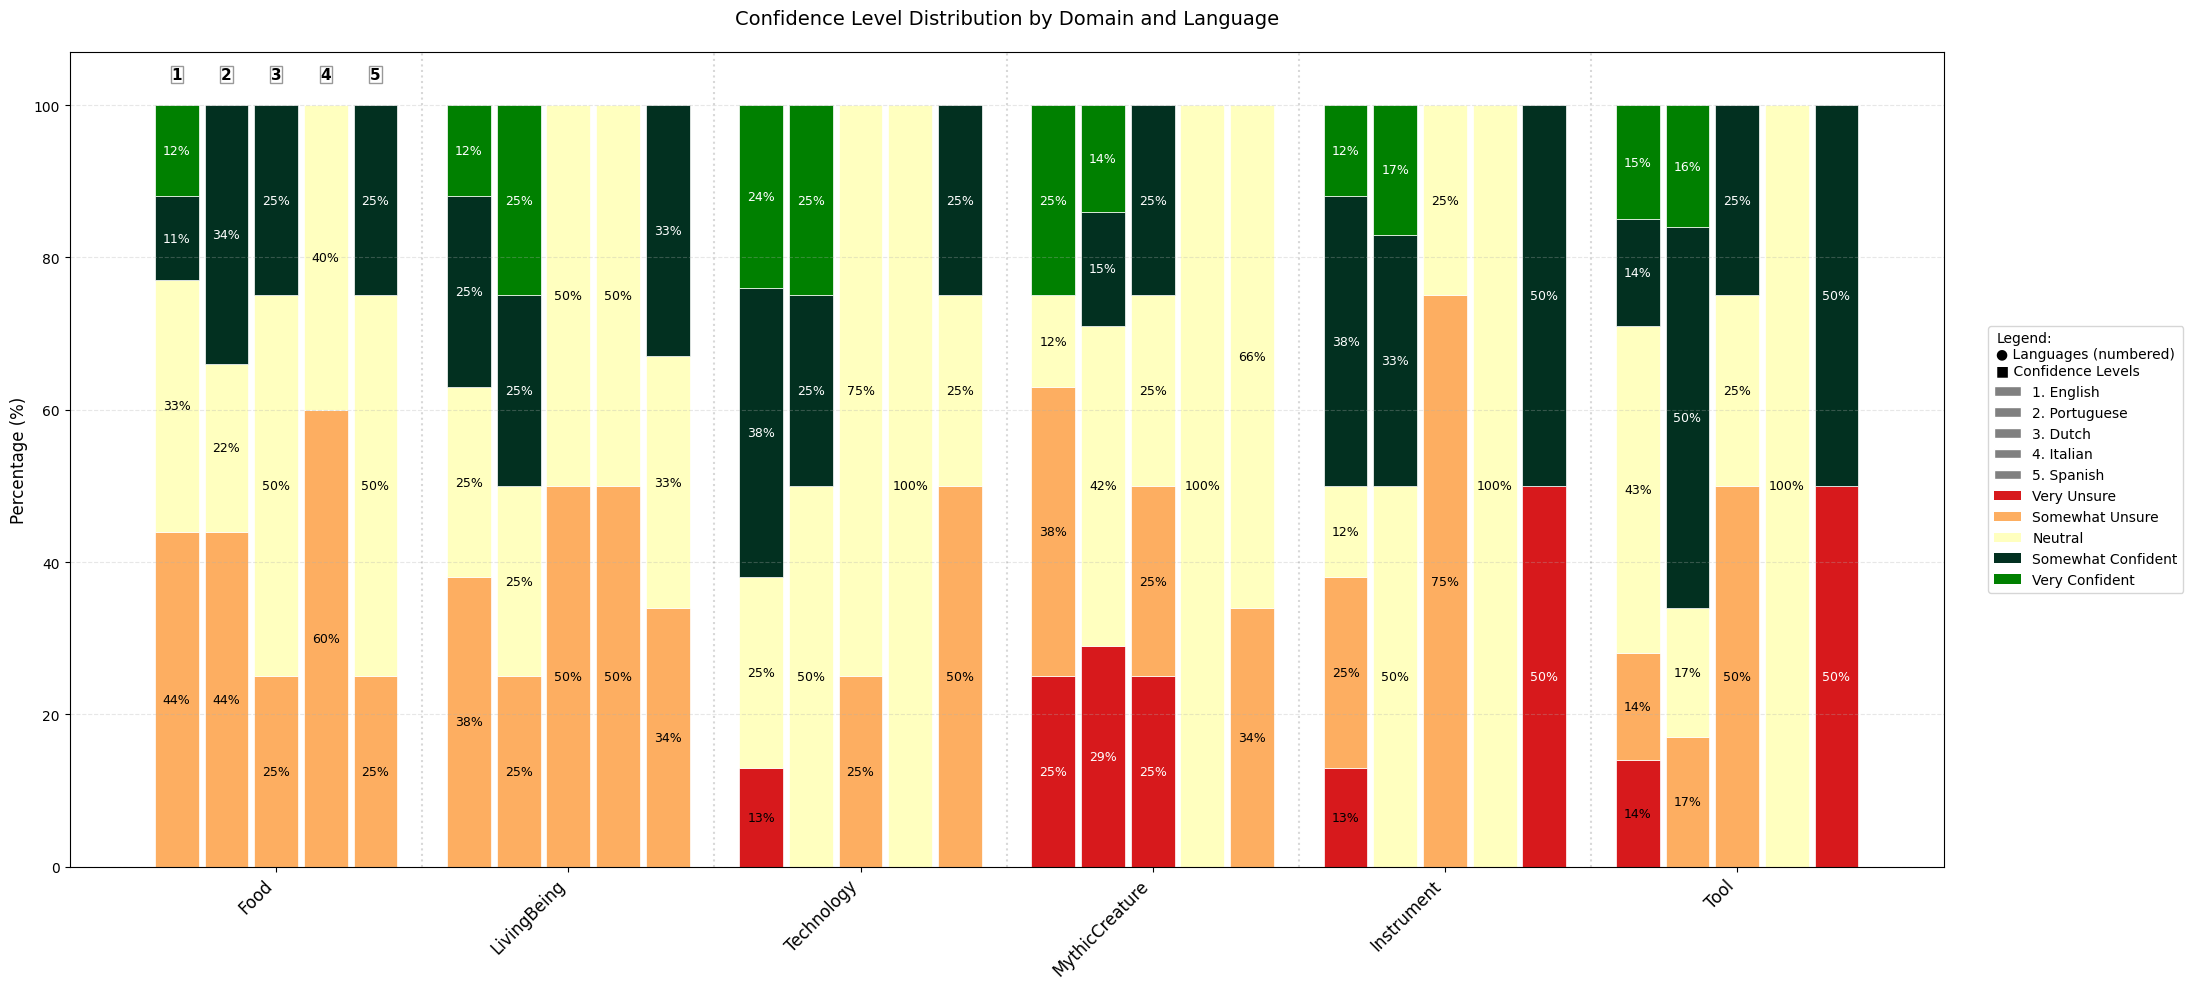

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Verified dataset (all sum to 100%)
data = {
    'Food': {
        'English': [0, 44, 33, 11, 12],
        'Portuguese': [0, 44, 22, 34, 0],
        'Dutch': [0, 25, 50, 25, 0],
        'Italian': [0, 60, 40, 0, 0],
        'Spanish': [0, 25, 50, 25, 0]
    },
    'LivingBeing': {
        'English': [0, 38, 25, 25, 12],
        'Portuguese': [0, 25, 25, 25, 25],
        'Dutch': [0, 50, 50, 0, 0],
        'Italian': [0, 50, 50, 0, 0],
        'Spanish': [0, 34, 33, 33, 0]
    },
    'Technology': {
        'English': [13, 0, 25, 38, 24],
        'Portuguese': [0, 0, 50, 25, 25],
        'Dutch': [0, 25, 75, 0, 0],
        'Italian': [0, 0, 100, 0, 0],
        'Spanish': [0, 50, 25, 25, 0]
    },
    'MythicCreature': {
        'English': [25, 38, 12, 0, 25],
        'Portuguese': [29, 0, 42, 15, 14],
        'Dutch': [25, 25, 25, 25, 0],
        'Italian': [0, 0, 100, 0, 0],
        'Spanish': [0, 34, 66, 0, 0]
    },
    'Instrument': {
        'English': [13, 25, 12, 38, 12],
        'Portuguese': [0, 0, 50, 33, 17],
        'Dutch': [0, 75, 25, 0, 0],
        'Italian': [0, 0, 100, 0, 0],
        'Spanish': [50, 0, 0, 50, 0]
    },
    'Tool': {
        'English': [14, 14, 43, 14, 15],
        'Portuguese': [0, 17, 17, 50, 16],
        'Dutch': [0, 50, 25, 25, 0],
        'Italian': [0, 0, 100, 0, 0],
        'Spanish': [50, 0, 0, 50, 0]
    }
}

# Validation check
for domain in data:
    for lang in data[domain]:
        total = sum(data[domain][lang])
        if total != 100:
            data[domain][lang][-1] += (100 - total)

domains = list(data.keys())
languages = ['English', 'Portuguese', 'Dutch', 'Italian', 'Spanish']
confidence_levels = ['Very Unsure', 'Somewhat Unsure', 'Neutral', 'Somewhat Confident', 'Very Confident']
colors = ['#d7191c', '#fdae61', '#ffffbf', '#023020', '#008000']

# Plot setup
fig, ax = plt.subplots(figsize=(22, 10))
x = np.arange(len(domains))
width = 0.15
gap = 0.02

# Calculate positions
n_languages = len(languages)
cluster_width = n_languages * width + (n_languages - 1) * gap
language_offsets = np.linspace(-cluster_width/2 + width/2, cluster_width/2 - width/2, n_languages)

# Create bars with percentage labels
for domain_idx, domain in enumerate(domains):
    for lang_idx, lang in enumerate(languages):
        bottom = 0
        for conf_idx, (conf, color) in enumerate(zip(confidence_levels, colors)):
            value = data[domain][lang][conf_idx]
            if value > 0:
                bar = ax.bar(x[domain_idx] + language_offsets[lang_idx], value, width,
                            bottom=bottom, color=color, edgecolor='white', linewidth=0.5)

                # Percentage label positioning
                y_pos = bottom + value/2
                text_color = 'black'
                bbox_props = None

                if conf_idx == 0:  # Red
                    text_color = 'white' if value >= 15 else 'black'
                elif conf_idx == 1:  # Yellow
                    text_color = 'black'
                    if value < 8:
                        bbox_props = dict(facecolor='white', alpha=0.7, pad=1)
                elif conf_idx >= 3:  # Blue tones
                    text_color = 'white'

                if value < 5:
                    y_pos = bottom + value + 1
                    va = 'bottom'
                else:
                    va = 'center'

                ax.text(x[domain_idx] + language_offsets[lang_idx], y_pos, f'{value}%',
                       ha='center', va=va, color=text_color, fontsize=9,
                       bbox=bbox_props)

            bottom += value

# Add language numbers - CORRECTED POSITIONING
max_bar_height = 100  # Since all stacks go to 100%
language_number_y = max_bar_height + 3  # Positioned just above the bars

for lang_idx, lang in enumerate(languages):
    for domain_idx in [0]:  # Only show above first domain
        ax.text(x[domain_idx] + language_offsets[lang_idx], language_number_y, str(lang_idx+1),
               ha='center', va='bottom', fontsize=11, fontweight='bold',
               bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', pad=0.5))

# Create legend
legend_elements = [
    Patch(facecolor='gray', edgecolor='white', label=f"{i+1}. {lang}")
    for i, lang in enumerate(languages)
] + [
    Patch(facecolor=colors[i], label=confidence_levels[i])
    for i in range(len(confidence_levels))
]

ax.legend(handles=legend_elements,
          title='Legend:\n● Languages (numbered)\n■ Confidence Levels',
          bbox_to_anchor=(1.02, 0.5),
          loc='center left',
          fontsize=10)

# Formatting
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Confidence Level Distribution by Domain and Language', fontsize=14, pad=20)
ax.set_xticks(x, domains, fontsize=12)
ax.set_ylim(0, 107)  # Adjusted to accommodate language numbers
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Domain separators
for i in range(len(domains)-1):
    ax.axvline(i+0.5, color='gray', linestyle=':', alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confidence_distribution.png', dpi=300, bbox_inches='tight')
plt.show()